<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#42659A; overflow:hidden; font-weight:250; font-family:helvetica;"> 0261_Project_004 - 03 </div>


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#617A9A; overflow:hidden; font-weight:270; font-family:helvetica;"> General Project Steps</div>
<br>
<H3 style="padding:1px; font-family:helvetica; padding-left:20px">Project Description and Information</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px">Web Scraping Financial Information</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px"> Backtesting Strategies</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px"> Index Tracking</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px"> Forward Testing Strategies</H3>
<br>


### Note: This is not financial advice and should not be treated as such. This is for educational purposes only.

<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Index Tracking & Forward Testing Strategies</div>


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Data Loading</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("seaborn")

In [2]:
#data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/dji001.csv",
#                   parse_dates=["Date"], index_col="Date")

### Using previous const, dji, const_prices from other notebook
## Historical Constituent prices for 30 index stocks
const_prices = pd.read_csv("/Users/luis/Documents/Programming/Courses_Programming/0261 1) Python Data Science with Pandas Master 12 Advanced Projects 2022/venv_0261_DS_12_Advanced_Projects_390/Projects/0261_Project_11/0261_Project_11_Data/Project_11_Materials/const_prices.csv",
                 parse_dates=["Date"], index_col="Date"
                )

more_info = pd.read_csv("/Users/luis/Documents/Programming/Courses_Programming/0261 1) Python Data Science with Pandas Master 12 Advanced Projects 2022/venv_0261_DS_12_Advanced_Projects_390/Projects/0261_Project_11/0261_Project_11_Data/Project_11_Materials/const.csv",
                 parse_dates=["Date_Added"], index_col="Date_Added"
                )

## Prices for the Dow Jones Index
dji = pd.read_csv("/Users/luis/Documents/Programming/Courses_Programming/0261 1) Python Data Science with Pandas Master 12 Advanced Projects 2022/venv_0261_DS_12_Advanced_Projects_390/Projects/0261_Project_11/0261_Project_11_Data/Project_11_Materials/dji.csv",
                 parse_dates=["Date"], index_col="Date"
                )


In [3]:
#const_prices.head()
#more_info.head()
#dji.head()

dji -> "Close" -> Rename: "Close" to "DJI"

more_info -> Selecting only "Company", "Ticker"
Merge: dji, more_info



In [4]:
### Only Close column and renaming it to DJI
#dji = dji["Close"].to_frame()
dji = dji.Close.to_frame().copy()

dji.rename(columns={"Close":"DJI"}, inplace=True)
dji.head(2)
           

,DJI
Date,
2007-01-03,12474.519531
2007-01-04,12480.690430


In [5]:
## Concatenating const_prices, dji
df = pd.concat([const_prices, dji], axis=1)
df.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.971429,60.360001,89.169998,61.160000,27.730000,70.970001,33.738300,NaN,200.720001,41.070000,...,64.540001,39.528004,53.549999,52.570000,NaN,35.306732,46.070000,47.549999,74.110001,12474.519531
2007-01-04,12.237143,59.919998,89.529999,61.000000,28.459999,70.279999,34.004654,NaN,198.850006,40.570000,...,64.050003,39.565765,53.099998,52.910000,NaN,35.502777,46.160000,47.779999,72.720001,12480.690430
2007-01-05,12.150000,59.130001,89.150002,60.220001,28.469999,70.550003,33.728436,NaN,199.050003,39.790001,...,63.500000,39.446194,52.410000,52.549999,NaN,34.895969,45.500000,47.389999,73.239998,12398.009766
2007-01-08,12.210000,59.689999,88.940002,60.290001,28.629999,71.449997,34.034248,NaN,203.729996,39.490002,...,63.639999,39.767151,52.020000,53.320000,NaN,34.363850,45.689999,47.000000,72.650002,12423.490234
2007-01-09,13.224286,59.310001,88.000000,60.619999,28.469999,70.629997,33.984924,NaN,204.080002,39.320000,...,63.480000,39.314034,51.889999,52.680000,NaN,34.503880,45.930000,47.389999,72.089996,12416.599609


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Data Processing</div>


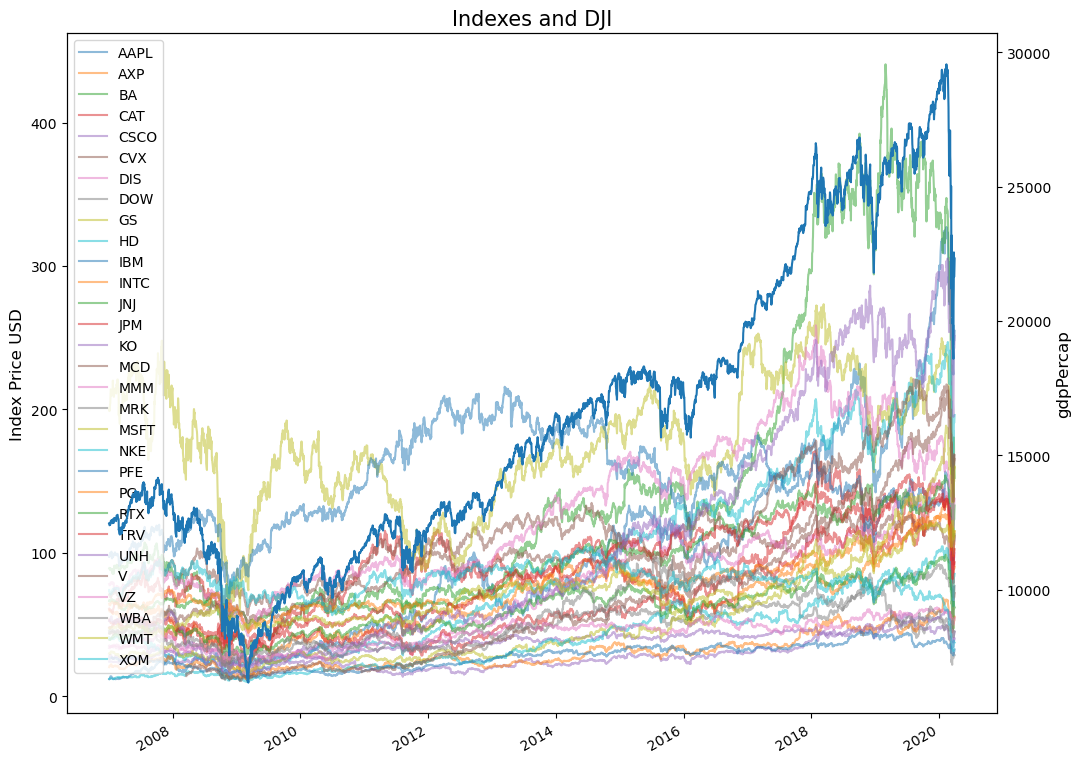

In [6]:
#df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
#plt.ylabel("DJI",fontsize = 15)
#plt.title("Indexes and DJI", fontsize = 20)
#plt.show()

### Way 01
#df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
#plt.title("Indexes and DJI", fontsize = 15)
#plt.ylabel("DJI",fontsize = 15)

### Way 02
### Source
### https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
### https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
### https://matplotlib.org/2.2.5/gallery/api/two_scales.html
# create figure and axis objects with subplots()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
# make a plot
df.iloc[:, :-1].plot(ax=ax, alpha=0.5)
# set x-axis label
ax.set_xlabel("", fontsize = 12)
# set y-axis label
ax.set_ylabel("Index Price USD",
              color="black",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df["DJI"], color="tab:blue")
ax2.set_ylabel("gdpPercap",color="black", fontsize=12)

plt.title("Indexes and DJI", fontsize = 15)
plt.show()
# save the plot as a file
#fig.savefig('.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')


- Dow Jones is on a different scale than the other ones
- Working with absolute prices (all stocks are starting at different price levels)
- Need to normalize to a common value (e.g. 100) to see if they improve or worsen

In [7]:
## Data Normalization
## Normalization to a common value to see if the stocks improve or worsen
## To have a point of comparison
norm = df.div(df.iloc[0]).mul(100)
norm

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
2007-01-04,102.219565,99.271036,100.403724,99.738391,102.632526,99.027755,100.789470,NaN,99.068356,98.782566,...,99.240784,100.095531,99.159662,100.646757,NaN,100.555262,100.195355,100.483700,98.124411,100.049468
2007-01-05,101.491641,97.962227,99.977575,98.463050,102.668589,99.408203,99.970761,NaN,99.167996,96.883373,...,98.388595,99.793033,97.871150,99.961955,NaN,98.836588,98.762753,99.663512,98.826066,99.386672
2007-01-08,101.992838,98.889990,99.742071,98.577503,103.245581,100.676336,100.877187,NaN,101.499599,96.152914,...,98.605514,100.605007,97.142859,101.426669,NaN,97.329454,99.175166,98.843324,98.029957,99.590932
2007-01-09,110.465394,98.260439,98.687902,99.117068,102.668589,99.520919,100.730991,NaN,101.673974,95.738982,...,98.357606,99.458687,96.900094,100.209246,NaN,97.726064,99.696116,99.663512,97.274316,99.535694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,2062.243426,139.247850,143.187174,165.696528,139.199420,93.772019,290.826751,NaN,76.524514,449.768694,...,160.009289,138.130872,175.051352,418.109196,NaN,141.587733,98.220100,241.913776,47.820805,165.977616
2020-03-25,2050.883039,149.387007,178.008298,171.141266,135.845650,97.604615,298.562768,NaN,77.286770,442.561470,...,156.368139,153.144408,172.138192,446.052895,NaN,141.446108,89.950074,230.073614,50.317097,169.950840
2020-03-26,2158.806649,154.555997,202.478420,180.673643,146.339713,107.622934,312.286036,NaN,82.597645,475.310465,...,166.377434,166.597681,184.257702,485.809399,NaN,151.642470,99.131753,230.956891,52.381594,180.785880


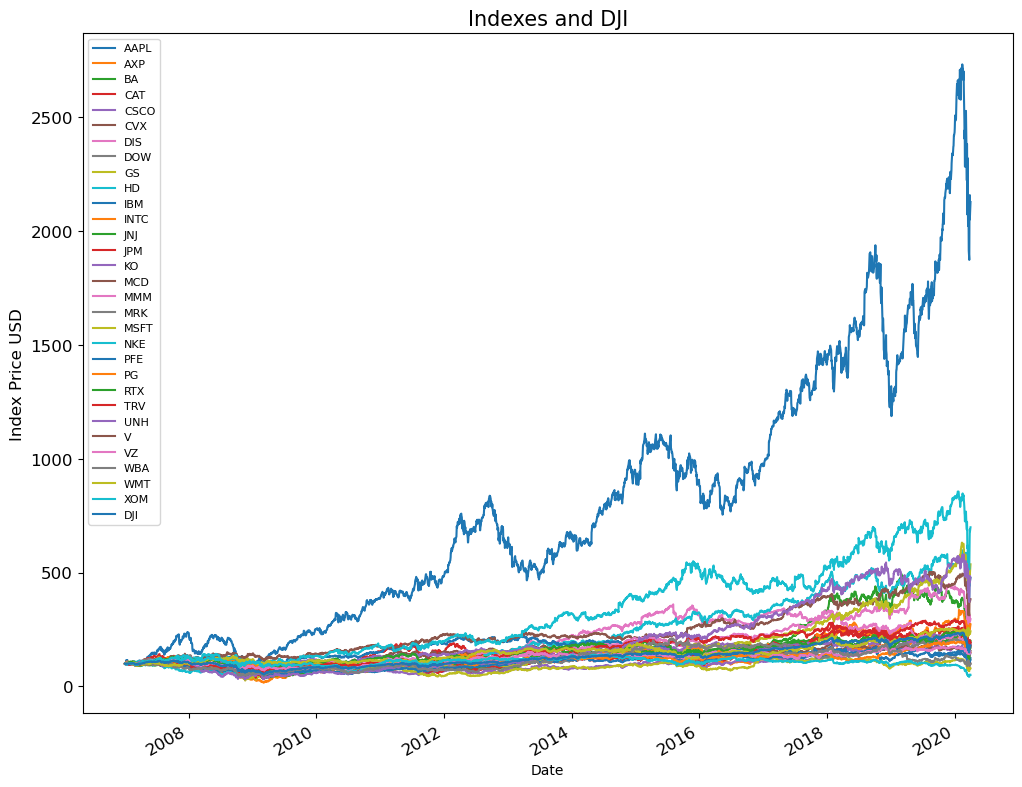

In [8]:
norm.plot(figsize = (12, 10), fontsize = 12)
plt.legend(fontsize = 8)
plt.ylabel("Index Price USD",color="black",fontsize=12)
plt.title("Indexes and DJI", fontsize = 15)
plt.show()


* Now all stocks are starting at the very same value 100
* Can see that the best performing stock is AAPL Apple
* Will drop apple to compare all of the other stocks

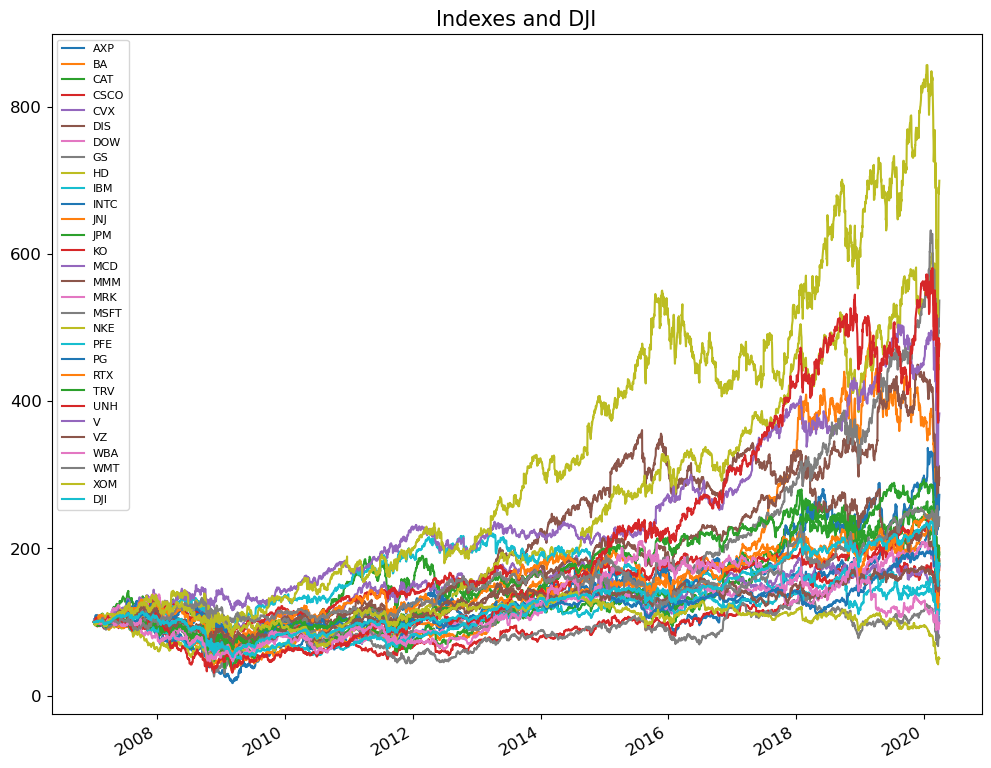

In [9]:
norm.drop(columns =["AAPL"]).plot(figsize = (12, 10), fontsize = 15)
plt.legend(fontsize = 8)

plt.xlabel("",color="black",fontsize=12)
#plt.ylabel("Index Price USD",color="black",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Indexes and DJI", fontsize = 15)
plt.show()

In [10]:
### Daily Returns with percentage change method
ret = df.pct_change()

In [11]:
ret.describe()

### mean is the mean daily return
### std is the std of daily returns.
### This is an indication of the risk or a metric for the risk on a daily basis
### It is typically shown on an annualized basis

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,259.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3029.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.001124,0.000404,0.000375,0.000393,0.000288,0.000172,0.000476,-0.001557,0.000221,0.000618,...,0.000244,0.000263,0.000362,0.000689,0.000996,0.000225,0.000153,0.000349,-0.000077,0.000252
std,0.020285,0.023861,0.020633,0.020599,0.018732,0.018264,0.017384,0.033533,0.024183,0.017243,...,0.011926,0.015987,0.018255,0.021072,0.019155,0.013661,0.017826,0.012961,0.015945,0.012395
min,-0.179195,-0.175949,-0.238484,-0.142822,-0.162107,-0.221248,-0.129846,-0.216577,-0.189596,-0.197938,...,-0.087373,-0.144765,-0.208004,-0.186362,-0.136435,-0.080685,-0.149873,-0.101832,-0.139525,-0.129265
25%,-0.007882,-0.007507,-0.008608,-0.008954,-0.007302,-0.007602,-0.006837,-0.014935,-0.009635,-0.006983,...,-0.004799,-0.006487,-0.006244,-0.008082,-0.007500,-0.006508,-0.008169,-0.005572,-0.007159,-0.003935
50%,0.000985,0.000643,0.000694,0.000392,0.000443,0.000633,0.000572,0.000554,0.000258,0.000528,...,0.000250,0.000508,0.000668,0.000616,0.001224,0.000525,0.000105,0.000540,0.000000,0.000560
75%,0.011166,0.009351,0.009931,0.010251,0.008722,0.008351,0.008090,0.012207,0.010234,0.008160,...,0.005530,0.007680,0.007360,0.009279,0.009248,0.006994,0.008873,0.006329,0.007235,0.005288
max,0.139050,0.218823,0.243186,0.147229,0.159505,0.227407,0.159722,0.209091,0.264678,0.140666,...,0.120090,0.157572,0.255556,0.347550,0.149973,0.146324,0.166355,0.117085,0.171905,0.113650


In [12]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    ###### Annualizing the mean of daily returns
    ###### 252 trading days in a year (typically)
    summary["Return"] = summary["mean"] * 252
    ###### Annualizing std of daily returns
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [13]:
## summary = Risk and Return
#summary = summary_ann(returns=ret)
summary = summary_ann(ret)
summary

,Return,Risk
AAPL,0.283326,0.322011
AXP,0.101747,0.378787
BA,0.094477,0.327538
CAT,0.099013,0.327003
CSCO,0.072630,0.297358
CVX,0.043249,0.289927
DIS,0.119955,0.275958
DOW,-0.392383,0.532319
GS,0.055702,0.383889
HD,0.155732,0.273726


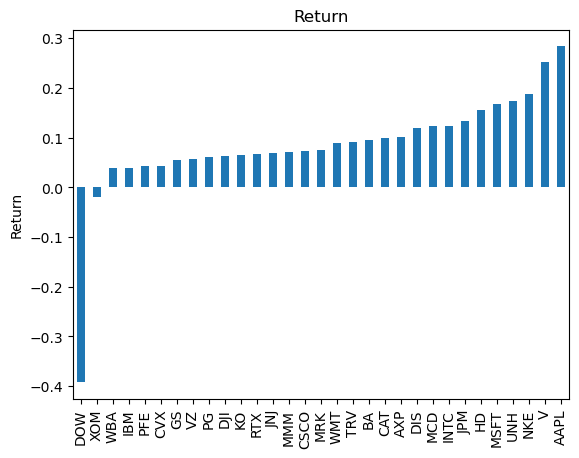

In [14]:
summary.sort_values(by="Return")["Return"].plot(kind='bar')
plt.title("Return", fontdict={'size':12})
plt.ylabel("Return")
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_002_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

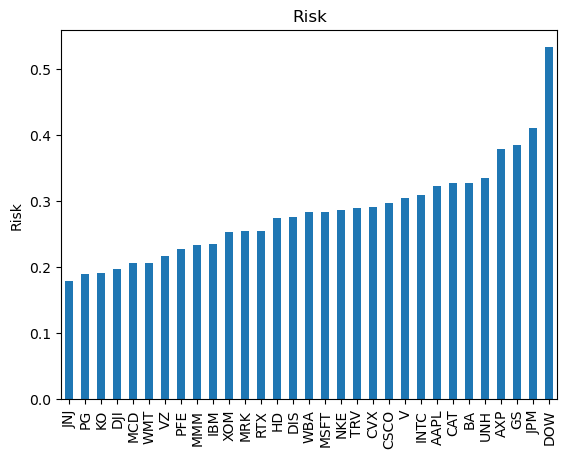

In [15]:
summary.sort_values(by="Risk")["Risk"].plot(kind='bar')
#plt.title("Risk")
plt.title("Risk", fontdict={'size':12})
plt.ylabel("Risk")
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_001_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

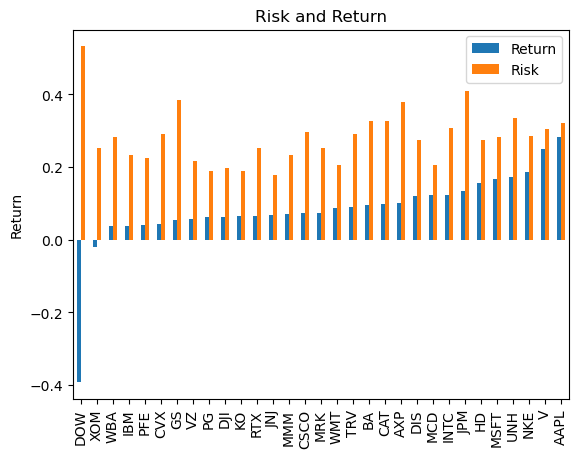

In [16]:
summary.sort_values(by="Return").plot(kind='bar')
plt.title("Risk and Return")
plt.ylabel("Return")
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_003_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

In [17]:
### merge
###more_info all rows, only columns Ticker and Company
### 
summary = summary.merge(more_info.loc[:, ["Ticker", "Company"]],
                        how="left", left_index=True, right_on="Ticker"
                       )


In [18]:
summary.head()

,Return,Risk,Ticker,Company
2015-03-19,0.283326,0.322011,AAPL,Apple Inc.
1982-08-30,0.101747,0.378787,AXP,American Express
1987-03-12,0.094477,0.327538,BA,Boeing
1991-05-06,0.099013,0.327003,CAT,Caterpillar Inc.
2009-06-08,0.072630,0.297358,CSCO,Cisco Systems


In [19]:
summary.set_index(keys="Company", inplace=True)

In [20]:
summary.head()

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO


In [21]:
###### Rename the index label NaN where DJI Dow Jones Index is
summary.rename(index={np.nan :"Down_Jones"}, inplace=True)

In [22]:
summary.head()

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">EDA</div>


In [23]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     259 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [24]:
more_info[more_info["Ticker"]=="DOW"]

,Company,Exchange,Symbol,Industry,Ticker
Date_Added,,,,,
2019-04-02,Dow Inc.,NYSE,NYSE: DOW,Chemical industry,DOW


In [25]:
more_info[more_info["Ticker"]=="DOW"]["Company"]

Date_Added
2019-04-02    Dow Inc.
Name: Company, dtype: object

In [26]:
summary.loc["Dow Inc."]

Return   -0.392383
Risk      0.532319
Ticker         DOW
Name: Dow Inc., dtype: object

In [27]:
## Dropping Dow Inc.
summary2 = summary.drop(index = "Dow Inc.")
summary2

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO
Chevron Corporation,0.043249,0.289927,CVX
The Walt Disney Company,0.119955,0.275958,DIS
Goldman Sachs,0.055702,0.383889,GS
The Home Depot,0.155732,0.273726,HD


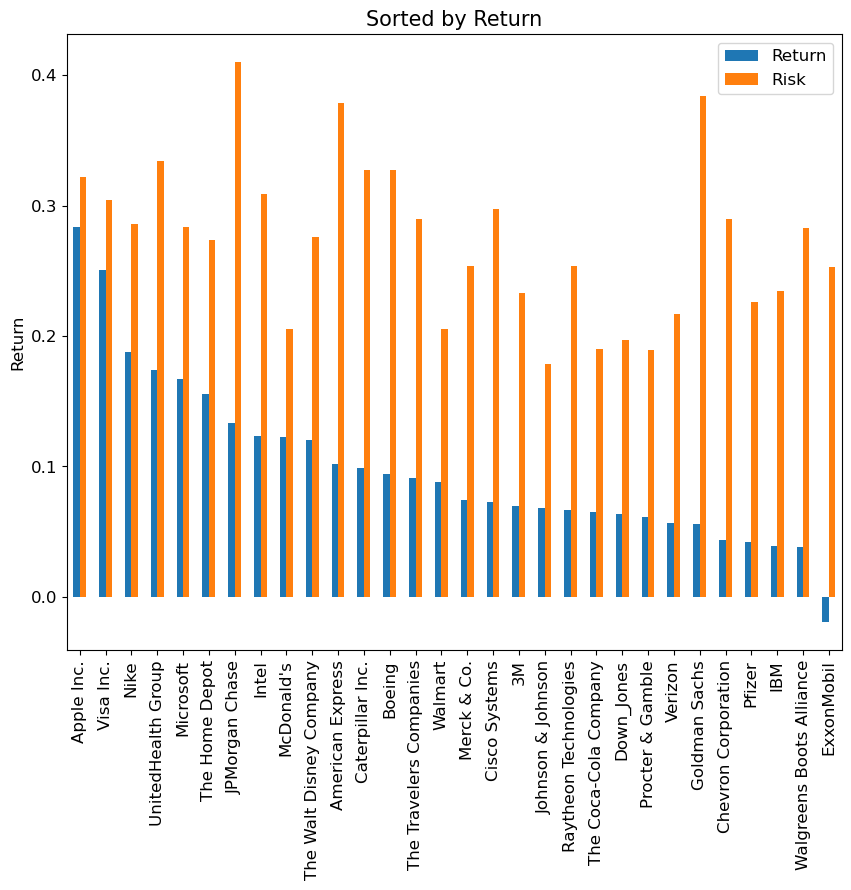

In [28]:
summary2.sort_values(by = "Return", ascending = False).plot(kind = "bar", figsize = (10, 8))
                                                            #fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.xlabel("")
plt.ylabel("Return", fontsize = 12)
plt.title("Sorted by Return", fontsize = 15)

plt.show()

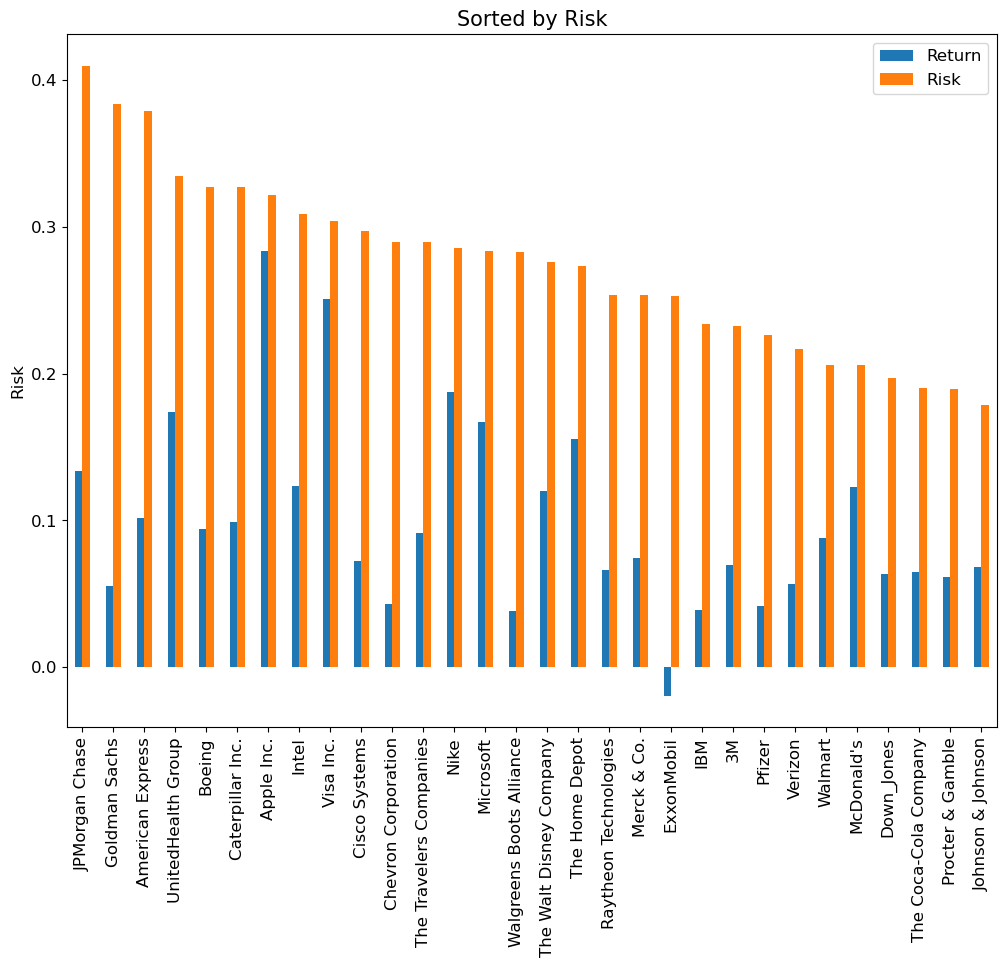

In [29]:
summary2.sort_values(by = "Risk", ascending = False).plot(kind = "bar", figsize = (12, 9))
                                                            #fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.xlabel("")
plt.ylabel("Risk", fontsize = 12)
plt.title("Sorted by Risk", fontsize = 15)

plt.show()

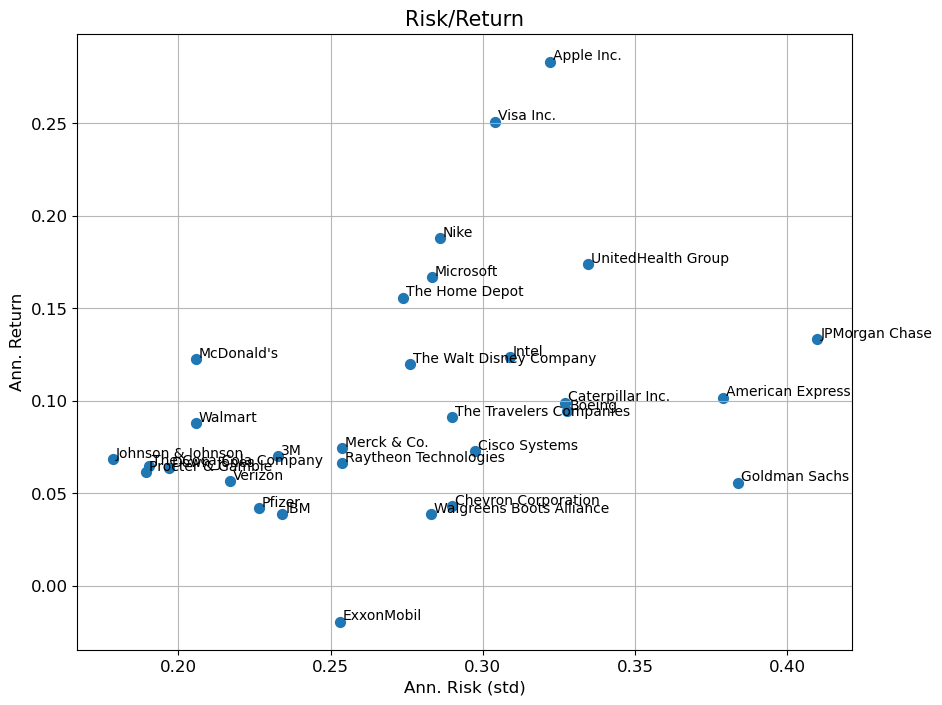

In [30]:
summary2.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (10,8), s = 50, fontsize = 12)
for i in summary2.index:
    #plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]+0.002), rotation=0, size = 15)
    plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.001, summary2.loc[i, "Return"]+0.001), rotation=0, size = 10)
plt.xlabel("Ann. Risk (std)", fontsize = 12)
plt.ylabel("Ann. Return", fontsize = 12)
plt.title("Risk/Return", fontsize = 15)
#plt.text(x=0.18, y=-0.07, s="* Annualized Risk and Return", fontdict={"fontsize":15})
#plt.text(x=0.34, y=-0.07, s="* Annualized Risk and Return", fontdict={"fontsize":15})
plt.grid(alpha=0.9)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_004_01.png", 
            bbox_inches='tight', dpi=90)

plt.show()

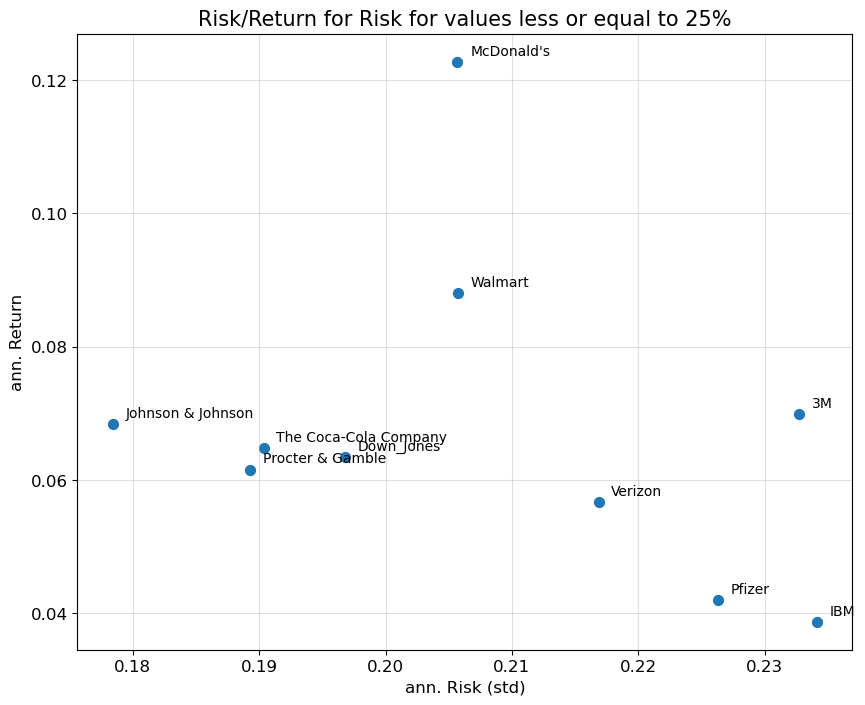

In [31]:
summary2_risk_loe025 = summary2[summary2["Risk"] <= 0.25]

summary2_risk_loe025.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (10,8), s = 50, fontsize = 12)
for i in summary2_risk_loe025.index:
    #plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]+0.002), rotation=0, size = 15)
    #plt.annotate(i, xy=(summary2_risk_loe025.loc[i, "Risk"]+0.001, summary2_risk_loe025.loc[i, "Return"]+0.001), rotation=0, size = 12)
    plt.annotate(i, xy=(summary2_risk_loe025.loc[i, "Risk"]+0.001, summary2_risk_loe025.loc[i, "Return"]+0.001), rotation=0, size = 10)
plt.xlabel("ann. Risk (std)", fontsize = 12)
plt.ylabel("ann. Return", fontsize = 12)
plt.title("Risk/Return for Risk for values less or equal to 25%", fontsize = 15)
plt.grid(alpha=0.4)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_004_02.png", 
            bbox_inches='tight', dpi=90)
plt.show()

In [32]:
#corr_matrix_01 = ret.corr()
corr_matrix_01 = ret.corr(numeric_only=True)
#corr_matrix_01

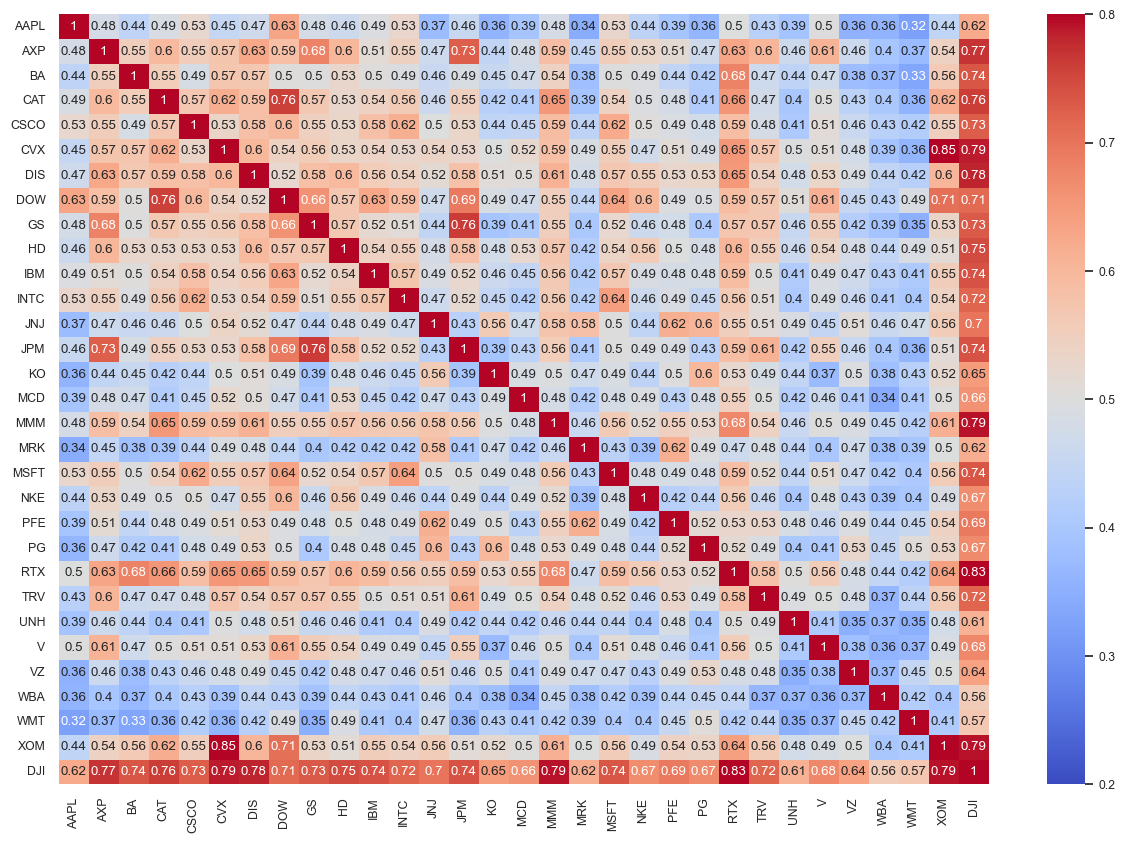

In [33]:
plt.figure(figsize=(15,10))
sns.set(font_scale=0.8)
#sns.heatmap(corr_matrix_01, cmap="RdYlGn", annot=True, vmin=0.2, vmax=0.8)
sns.heatmap(corr_matrix_01, cmap="coolwarm", annot=True, vmin=0.2, vmax=0.8)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_005_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

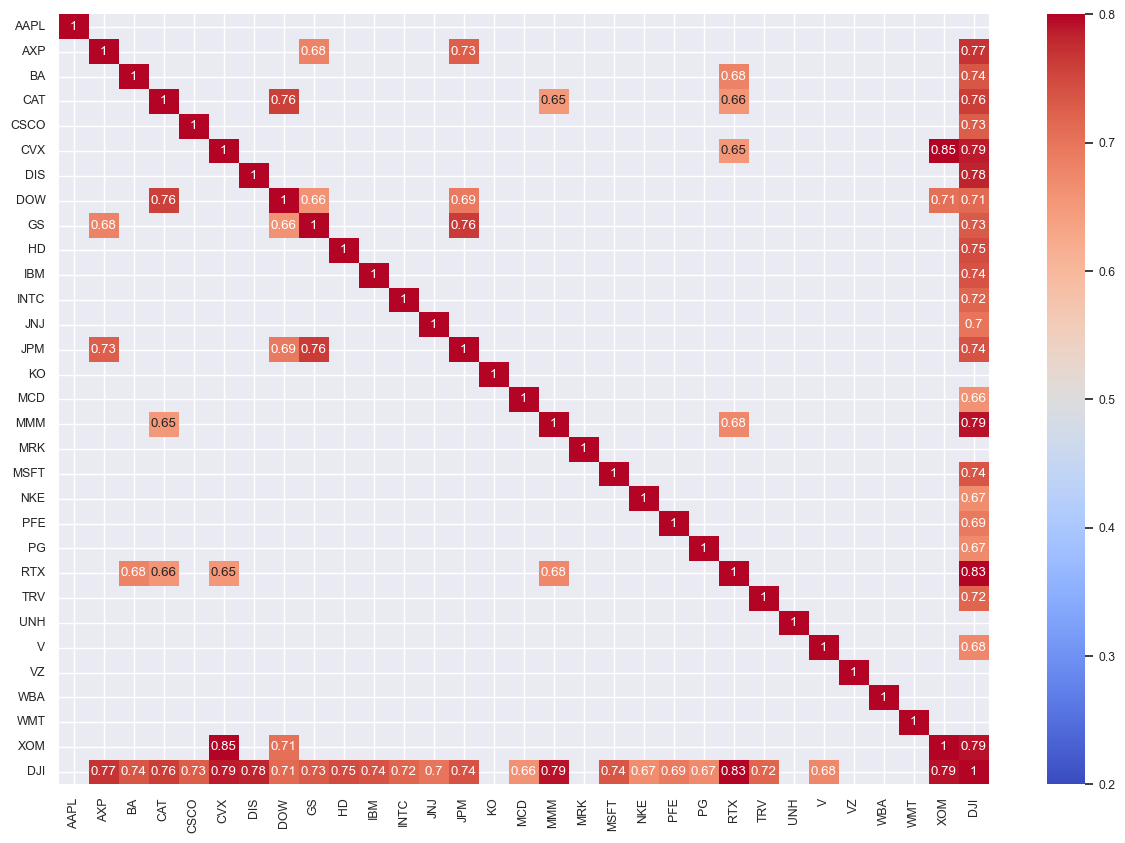

In [34]:
plt.figure(figsize=(15,10))
sns.set(font_scale=0.8)
#sns.heatmap(corr_matrix_01, cmap="RdYlGn", annot=True, vmin=0.2, vmax=0.8)
sns.heatmap(corr_matrix_01[corr_matrix_01 > 0.65], cmap="coolwarm", annot=True, vmin=0.2, vmax=0.8)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_005_02.png", 
            bbox_inches='tight', dpi=90)
plt.show()

<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Index Tracking</div>


Plan: Track the DJI with only 10 stocks (Tracking Portfolio).
Criteria to select Tracking Portfolio: Those 10 stocks with the **lowest Individual Tracking Error (TE)** in the Training/Fitting Period.

* Training/Fitting Period: 2017, 2018
* (Forward) Testing Period: 2019

* Once the 10 tracking Stocks had been identified will need to find the **Optimal weights** in the Tracking Portfolio that **minimize Tracking Error**



In [35]:
###### Stock prices of the 30 constituents and the Dow Jones Index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     260 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [36]:
df02 = df.loc["2017":"2018"].copy()
df02

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.150002,75.349998,156.970001,93.989998,30.540001,117.849998,106.080002,NaN,241.570007,134.309998,...,84.199997,69.748268,120.900002,161.449997,79.500000,54.580002,82.959999,68.660004,90.889999,19881.759766
2017-01-04,116.019997,76.260002,158.619995,93.570000,30.100000,117.820000,107.440002,NaN,243.130005,135.500000,...,84.500000,69.792320,120.250000,161.910004,80.150002,54.520000,82.980003,69.059998,89.889999,19942.160156
2017-01-05,116.610001,75.320000,158.710007,93.000000,30.170000,117.309998,107.379997,NaN,241.320007,133.899994,...,85.059998,70.075516,118.330002,162.179993,81.089996,54.639999,83.029999,69.209999,88.550003,19899.289062
2017-01-06,117.910004,75.470001,159.100006,93.040001,30.230000,116.839996,108.980003,NaN,244.899994,133.529999,...,85.029999,70.830711,118.269997,162.410004,82.209999,53.259998,83.099998,68.260002,88.500000,19963.800781
2017-01-09,118.989998,75.860001,158.320007,92.370003,30.180000,115.839996,108.360001,NaN,242.889999,134.309998,...,84.400002,70.169922,117.320000,161.949997,81.750000,52.680000,82.550003,68.709999,87.040001,19887.380859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,146.830002,89.500000,294.160004,116.949997,40.279999,100.989998,100.349998,NaN,156.350006,158.139999,...,87.360001,64.229073,112.629997,232.940002,121.730003,53.049999,65.260002,85.820000,65.510002,21792.199219
2018-12-26,157.169998,93.839996,313.929993,124.760002,42.470001,107.389999,105.830002,NaN,162.929993,168.279999,...,90.089996,66.714912,117.169998,243.350006,130.229996,54.439999,67.720001,90.410004,68.639999,22878.449219
2018-12-27,156.149994,94.680000,317.140015,126.669998,42.910000,109.320000,106.519997,NaN,165.410004,170.320007,...,92.019997,66.557587,118.669998,245.970001,132.009995,55.150002,68.360001,91.589996,68.940002,23138.820312


In [37]:
## Normalization
norm02 = df02.div(df02.iloc[0]).mul(100)
norm02

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,99.888072,101.207702,101.051152,99.553146,98.559265,99.974545,101.282052,NaN,100.645775,100.886012,...,100.356298,100.063159,99.462364,100.284922,100.817612,99.890067,100.024113,100.582572,98.899769,100.303798
2017-01-05,100.396039,99.960187,101.108496,98.946699,98.788471,99.541790,101.225486,NaN,99.896510,99.694733,...,101.021378,100.469184,97.874277,100.452150,101.999995,100.109926,100.084378,100.801042,97.425463,100.088168
2017-01-06,101.515284,100.159260,101.356950,98.989257,98.984933,99.142977,102.733787,NaN,101.378477,99.419255,...,100.985750,101.551928,97.824644,100.594616,103.408804,97.581525,100.168755,99.417417,97.370448,100.412645
2017-01-09,102.445111,100.676844,100.860041,98.276418,98.821216,98.294440,102.149320,NaN,100.546422,100.000000,...,100.237535,100.604537,97.038874,100.309693,102.830189,96.518869,99.505791,100.072816,95.764112,100.028273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,126.414120,118.779034,187.398867,124.428130,131.892592,85.693678,94.598413,NaN,64.722441,117.742538,...,103.752974,92.086978,93.159633,144.279967,153.119501,97.196771,78.664420,124.992711,72.076139,109.609006
2018-12-26,135.316398,124.538817,199.993623,132.737531,139.063523,91.124311,99.764329,NaN,67.446284,125.292236,...,106.995249,95.650995,96.914803,150.727786,163.811315,99.743490,81.629703,131.677831,75.519859,115.072556
2018-12-27,134.438219,125.653619,202.038614,134.769657,140.504252,92.761987,100.414776,NaN,68.472906,126.811116,...,109.287411,95.425433,98.155498,152.350577,166.050308,101.044338,82.401159,133.396434,75.849932,116.382154


In [38]:
###### Selecting the daily returns of the period
### Note: Return was already done so just filtering dates

#ret = df.pct_change()
## Error: I used df and was return
#ret02 = df.loc["2017":"2018"].copy()
ret02 = ret.loc["2017":"2018"].copy()
ret02

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.002849,0.017144,0.008286,0.013479,0.010589,0.001274,0.017847,NaN,0.008854,0.001715,...,0.001427,0.011038,-0.012416,0.008810,0.018970,0.022480,0.002417,-0.006655,0.006980,0.006030
2017-01-04,-0.001119,0.012077,0.010512,-0.004469,-0.014407,-0.000255,0.012821,NaN,0.006458,0.008860,...,0.003563,0.000632,-0.005376,0.002849,0.008176,-0.001099,0.000241,0.005826,-0.011002,0.003038
2017-01-05,0.005085,-0.012326,0.000567,-0.006092,0.002326,-0.004329,-0.000558,NaN,-0.007445,-0.011808,...,0.006627,0.004058,-0.015967,0.001668,0.011728,0.002201,0.000602,0.002172,-0.014907,-0.002150
2017-01-06,0.011148,0.001992,0.002457,0.000430,0.001989,-0.004006,0.014900,NaN,0.014835,-0.002763,...,-0.000353,0.010777,-0.000507,0.001418,0.013812,-0.025256,0.000843,-0.013726,-0.000565,0.003242
2017-01-09,0.009159,0.005168,-0.004903,-0.007201,-0.001654,-0.008559,-0.005689,NaN,-0.008207,0.005841,...,-0.007409,-0.009329,-0.008032,-0.002832,-0.005595,-0.010890,-0.006618,0.006592,-0.016497,-0.003828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.025874,-0.020037,-0.034116,-0.025985,-0.037515,-0.030899,-0.037133,NaN,-0.023118,-0.014581,...,-0.039683,-0.038802,-0.029554,-0.022657,-0.020361,-0.034050,-0.029735,-0.015035,-0.038315,-0.029100
2018-12-26,0.070422,0.048492,0.067208,0.066781,0.054369,0.063373,0.054609,NaN,0.042085,0.064120,...,0.031250,0.038703,0.040309,0.044690,0.069827,0.026202,0.037695,0.053484,0.047779,0.049846
2018-12-27,-0.006490,0.008951,0.010225,0.015309,0.010360,0.017972,0.006520,NaN,0.015221,0.012123,...,0.021423,-0.002358,0.012802,0.010766,0.013668,0.013042,0.009451,0.013052,0.004371,0.011381


In [39]:
ret02["DJI"][0:2]

Date
2017-01-03    0.006030
2017-01-04    0.003038
Name: DJI, dtype: float64

In [40]:
#ret02["AAPL"][0]
##0.002849264651392014
ret02["DJI"][0]
##0.006029579033391519
#(ret02["AAPL"] - ret02["DJI"])[0]
##-0.003180314381999505

##0.002849264651392014-0.006029579033391519=-0.003180314381999505

0.006029579033391519

In [41]:
###### TE Tracking Error
###### Return differences between the stocks daily returns and the daily returns of the index
ret_diff = ret02.sub(ret02.DJI, axis = 0)
ret_diff

###### Example 01
######          AAPL       ...      DJI
###### Date    0.002849    ...   0.006030

###### AAPL - DJI
###### 0.002849 - 0.006030 = -0.003180


######          AAPL       ...      DJI
###### Date   -0.003180    ...      0.0


###### Example 02
###ret02["AAPL"][0] = 0.002849264651392014
### ret02["DJI"][0] = 0.006029579033391519
### (ret02["AAPL"] - ret02["DJI"])[0]
###0.002849264651392014-0.006029579033391519 = -0.003180314381999505

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.003180,0.011114,0.002257,0.007449,0.004559,-0.004755,0.011817,NaN,0.002824,-0.004314,...,-0.004602,0.005009,-0.018446,0.002781,0.012940,0.016451,-0.003613,-0.012685,0.000950,0.0
2017-01-04,-0.004157,0.009039,0.007474,-0.007507,-0.017445,-0.003293,0.009783,NaN,0.003420,0.005822,...,0.000525,-0.002406,-0.008414,-0.000189,0.005138,-0.004137,-0.002797,0.002788,-0.014040,0.0
2017-01-05,0.007235,-0.010177,0.002717,-0.003942,0.004475,-0.002179,0.001591,NaN,-0.005295,-0.009658,...,0.008777,0.006207,-0.013817,0.003817,0.013878,0.004351,0.002752,0.004322,-0.012757,0.0
2017-01-06,0.007906,-0.001250,-0.000785,-0.002812,-0.001253,-0.007248,0.011659,NaN,0.011593,-0.006005,...,-0.003595,0.007535,-0.003749,-0.001824,0.010570,-0.028498,-0.002399,-0.016968,-0.003807,0.0
2017-01-09,0.012987,0.008996,-0.001075,-0.003373,0.002174,-0.004731,-0.001861,NaN,-0.004379,0.009669,...,-0.003581,-0.005501,-0.004205,0.000996,-0.001767,-0.007062,-0.002791,0.010420,-0.012669,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.003226,0.009063,-0.005015,0.003116,-0.008414,-0.001799,-0.008033,NaN,0.005983,0.014519,...,-0.010583,-0.009702,-0.000453,0.006444,0.008740,-0.004949,-0.000635,0.014065,-0.009214,0.0
2018-12-26,0.020576,-0.001354,0.017362,0.016935,0.004524,0.013527,0.004763,NaN,-0.007761,0.014275,...,-0.018596,-0.011143,-0.009537,-0.005156,0.019981,-0.023644,-0.012150,0.003638,-0.002067,0.0
2018-12-27,-0.017870,-0.002429,-0.001155,0.003929,-0.001020,0.006591,-0.004861,NaN,0.003841,0.000742,...,0.010042,-0.013739,0.001421,-0.000614,0.002287,0.001661,-0.001930,0.001671,-0.007010,0.0


In [42]:
###### Calculating the mean return differences and the std
ret_diff.agg(["mean", "std"]).T

###### The return average (mean) is also 0 and the std since there was 0's on ret_diff
###### The Standard Deviation, or the volatility of the differences is the TE Tracking Error
###### Try to minimize the TE
###### So first identify the stocks with the lowest TE
###### 

,mean,std
AAPL,0.000362,0.011576
AXP,0.000210,0.008355
BA,0.001214,0.011468
CAT,0.000409,0.012363
CSCO,0.000446,0.009521
CVX,-0.000445,0.009945
DIS,-0.000198,0.009633
DOW,NaN,NaN
GS,-0.000979,0.010002
HD,0.000196,0.008481


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Selecting the Tracking Stocks</div>


In [43]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    ###### Annualizing the average differences
    ###### Calling them Return Premium
    ###### So it is either negative or positive
    summary["Premium"] = summary["mean"] * 252
    ###### Annualizing the Std and calling it Tracking Error
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [44]:
###### Passing return differences to the tracking function
###### Mean (or average) premium on an annualized basis for all stocks
###### Also the annualized Tracking Error
###### Again, for the DJI we have value 0
tracking = tracking_ann(returns=ret_diff)
tracking

,Premium,TE
AAPL,0.091152,0.183767
AXP,0.053010,0.132638
BA,0.306013,0.182054
CAT,0.103005,0.196256
CSCO,0.112351,0.151141
CVX,-0.112171,0.157867
DIS,-0.049997,0.152914
DOW,NaN,NaN
GS,-0.246714,0.158781
HD,0.049276,0.134628


In [45]:
tracking.sort_values(by = "TE")


,Premium,TE
DJI,0.000000,0.000000
MMM,-0.041338,0.124822
JPM,-0.011811,0.131067
PFE,0.069015,0.131856
V,0.191612,0.131870
AXP,0.053010,0.132638
RTX,-0.090333,0.133377
KO,-0.017858,0.134622
HD,0.049276,0.134628
XOM,-0.217854,0.136345


In [46]:
###### Sorting stocks by TE
###### Want to minimize TE
tracking.sort_values(by="TE", ascending=True)


,Premium,TE
DJI,0.000000,0.000000
MMM,-0.041338,0.124822
JPM,-0.011811,0.131067
PFE,0.069015,0.131856
V,0.191612,0.131870
AXP,0.053010,0.132638
RTX,-0.090333,0.133377
KO,-0.017858,0.134622
HD,0.049276,0.134628
XOM,-0.217854,0.136345


In [47]:
###### Including the Dow Jones Index
###### number of assets is 10
noa = 10
tracking_stocks = tracking.sort_values(by = "TE", ascending=True).index[:noa+1]
tracking_stocks

Index(['DJI', 'MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM',
       'TRV'],
      dtype='object')

In [48]:
###### Searching at the normalized prices of those 10 stocks and the DJI
norm_track = norm02.loc[:, tracking_stocks]
norm_track

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV
Date,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364
2017-01-05,100.088168,99.809044,98.716035,101.848487,101.999995,99.960187,100.469184,99.880385,99.694733,97.425463,97.874277
2017-01-06,100.412645,100.101091,98.727501,101.454544,103.408804,100.159260,101.551928,99.856465,99.419255,97.370448,97.824644
2017-01-09,100.028273,99.561922,98.796282,101.424246,102.830189,100.676844,100.604537,98.851676,100.000000,95.764112,97.038874
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,100.320130,105.628793,122.878786,153.119501,118.779034,92.086978,109.952153,117.742538,72.076139,93.159633
2018-12-26,115.072556,104.611059,110.008019,127.848481,163.811315,124.538817,95.650995,112.296649,125.292236,75.519859,96.914803
2018-12-27,116.382154,107.104742,111.246128,129.848480,166.050308,125.653619,95.425433,113.708133,126.811116,75.849932,98.155498


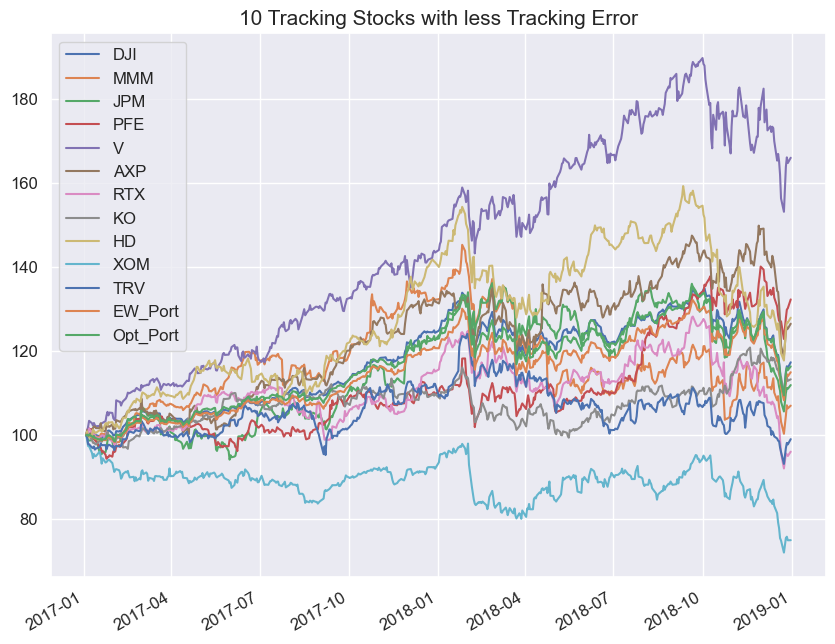

In [133]:
noa=10

norm_track.plot(figsize = (10, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.xlabel("")
#plt.ylabel("")
plt.title(f"{noa} Tracking Stocks with less Tracking Error", fontsize = 15)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_006_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

In [50]:
## Dropping the DOI Dow Jones Index and only select the 10 stocks
## Stocks used: 10 = noa

tracking_stocks = tracking_stocks[1:]
tracking_stocks


Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Index Tracking - A Simple Tracking Portfolio</div>


In [51]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [52]:
### Equal weighted portfolio
###10 stocks where each stock has the same amount of weight
### (Starting point of optimization)
#eweights = np.full(noa, 1/noa)
noa = 10
eweights = np.full(shape=noa, fill_value=1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [53]:
## Calculate the daily returns
## Calculate the daily returns for the equally weighted portfolio
## Note: For an equally weighted portfolio can use:
##ret02.loc[:, tracking_stocks].dot(eweights)
## or can use:
###ret02.loc[:, tracking_stocks].mean(axis=1)

###### To calculate returns for portfolios that are not equally weighted use the dot product
ret02.loc[:, tracking_stocks].dot(eweights)


Date
2017-01-03    0.007562
2017-01-04    0.001641
2017-01-05   -0.003983
2017-01-06    0.002168
2017-01-09   -0.004350
                ...   
2018-12-24   -0.027788
2018-12-26    0.045523
2018-12-27    0.011286
2018-12-28   -0.004372
2018-12-31    0.008403
Length: 502, dtype: float64

In [54]:
### Calculate Portfolio Returns (Based on Weights)
## All rows using the selected stocks and applying the dot product
## Note: dot product and not mean (for equal or not equally weighted portfolio)
def port_ret(weights):
    return ret02.loc[:, tracking_stocks].dot(weights)


In [55]:
### Define function to be minimized
### Minimize Tracking Error of the Tracking Portfolio

### Calculated the portfolio returns
### Substract the Dow Jones Index
## Getting the diff between the tracking porfolio and the DJI
## Calculate the std to get the tracking error on a daily basis
### Annualize the Daily tracking error
def tracking_error(weights):
    return port_ret(weights).sub(ret02.DJI).std() * np.sqrt(252)


In [56]:
tracking_error(weights=eweights)
###### Result: Annualized Tracking Error of 4.12%
###### Could compare this to the individual tracking errors of the stocks

0.04120933686266802

In [57]:
###### Comparing the individual Tracking errors
#tracking.sort_values(by="TE")


In [58]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [59]:
### Calculating Normalized Prices
## Starting at the second day of the year (2017-01-04) because want to have the value 100 at the start
## Cummulative product for each and every time stamp
### Want to have a starting base value of 100 (so multiplying it by 100)
##  Saving results in equally weighted portfolio variable

ew_port = port_ret(weights=eweights)[1:].add(1).cumprod().mul(100)
ew_port
###### The first trading day of the year in 2017 is the 3rd of January. Here starting at the 4th with 100.16
###### on the 3rd of January want to have 100


Date
2017-01-04    100.164136
2017-01-05     99.765133
2017-01-06     99.981424
2017-01-09     99.546547
2017-01-10     99.482801
                 ...    
2018-12-24    108.298000
2018-12-26    113.228018
2018-12-27    114.505929
2018-12-28    114.005345
2018-12-31    114.963346
Length: 501, dtype: float64

In [60]:
###### Copying the normalized equally weighted portfolio to a new column
###### on the dataframe normalized tracking (norm_track)

norm_track["EW_Port"] = ew_port

In [61]:
###### Making sure that at the first day starting at the base value of 100
norm_track.iloc[0]
## EW_Port      NaN

DJI        100.0
MMM        100.0
JPM        100.0
PFE        100.0
V          100.0
AXP        100.0
RTX        100.0
KO         100.0
HD         100.0
XOM        100.0
TRV        100.0
EW_Port      NaN
Name: 2017-01-03 00:00:00, dtype: float64

In [62]:
norm_track.iloc[0,-1]

nan

In [63]:
###### Making sure that at the first day starting at the base value of 100
## Setting 100 to the first row, which was 0
norm_track.iloc[0, -1] = 100

In [64]:
## confirmation that first row is 100 for all
norm_track.iloc[0]

DJI        100.0
MMM        100.0
JPM        100.0
PFE        100.0
V          100.0
AXP        100.0
RTX        100.0
KO         100.0
HD         100.0
XOM        100.0
TRV        100.0
EW_Port    100.0
Name: 2017-01-03 00:00:00, dtype: float64

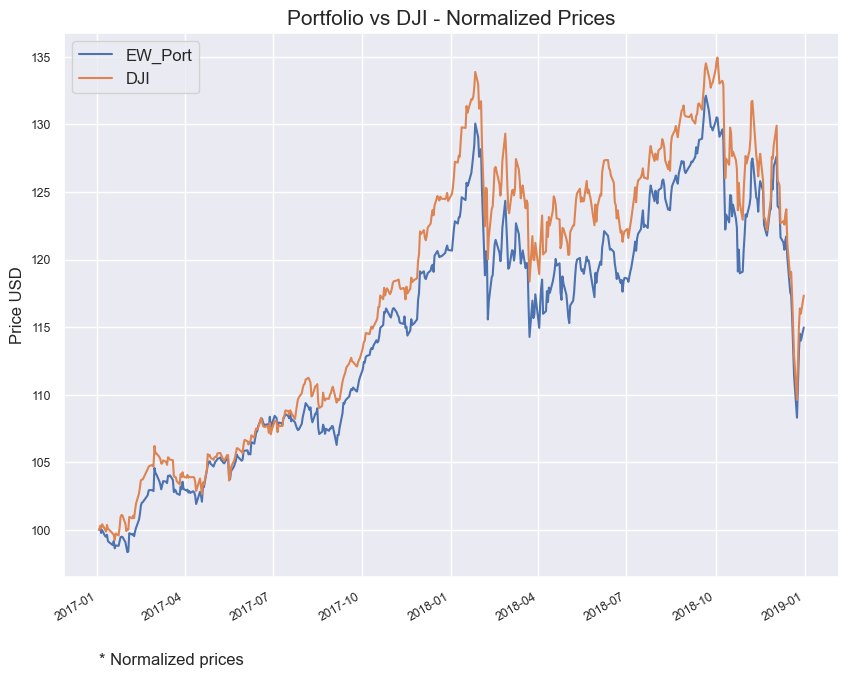

In [136]:
### Comparing the Dow Jone Index vs Equally weighted portfolio
s=pd.Series(norm_track[["EW_Port", "DJI"]].index)
#s
norm_track[["EW_Port", "DJI"]].plot(figsize = (10, 8))

plt.xlabel("")
plt.ylabel("Price USD", fontsize=12)
plt.legend(fontsize = 12, loc = 2)
plt.title("Portfolio vs DJI - Normalized Prices", fontsize=15)

### Using timestamp on x
plt.text(x=norm_track[["EW_Port", "DJI"]].index[0], y=90, s="* Normalized prices", fontsize=12)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_007_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

The Equally weight portfolio tries to track the Dow Jones Index.
It is not perfect, but it is close. Can further minimize the tracking error by optimizing the weights.


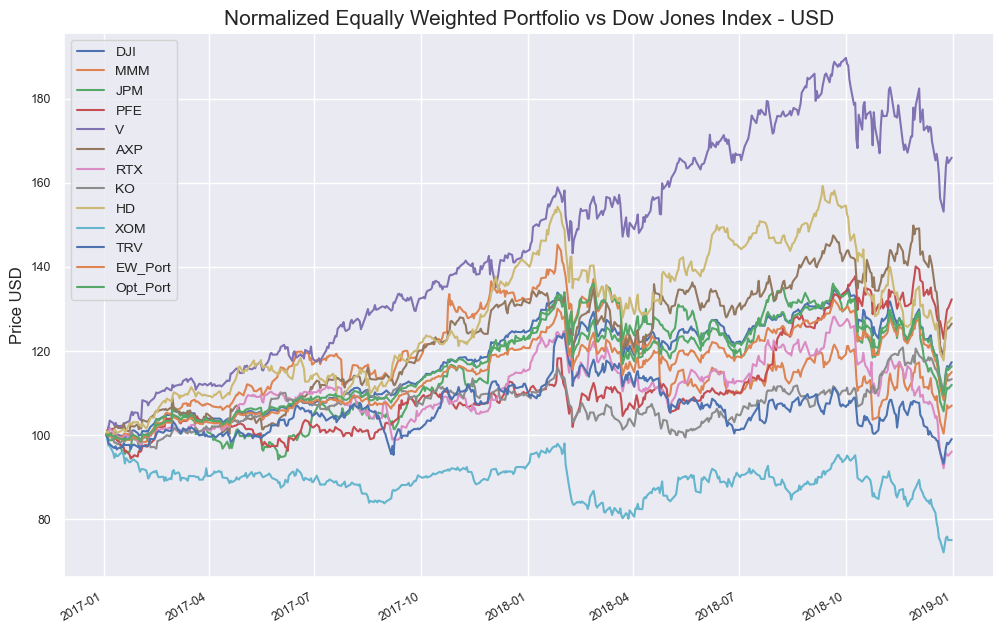

In [139]:
norm_track.plot(figsize = (12, 8))
plt.legend(fontsize = 10, loc = 2)
plt.xlabel("")
plt.ylabel("Price USD", fontsize=12)
plt.title("Normalized Equally Weighted Portfolio vs Dow Jones Index - USD", fontsize=15)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_008_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

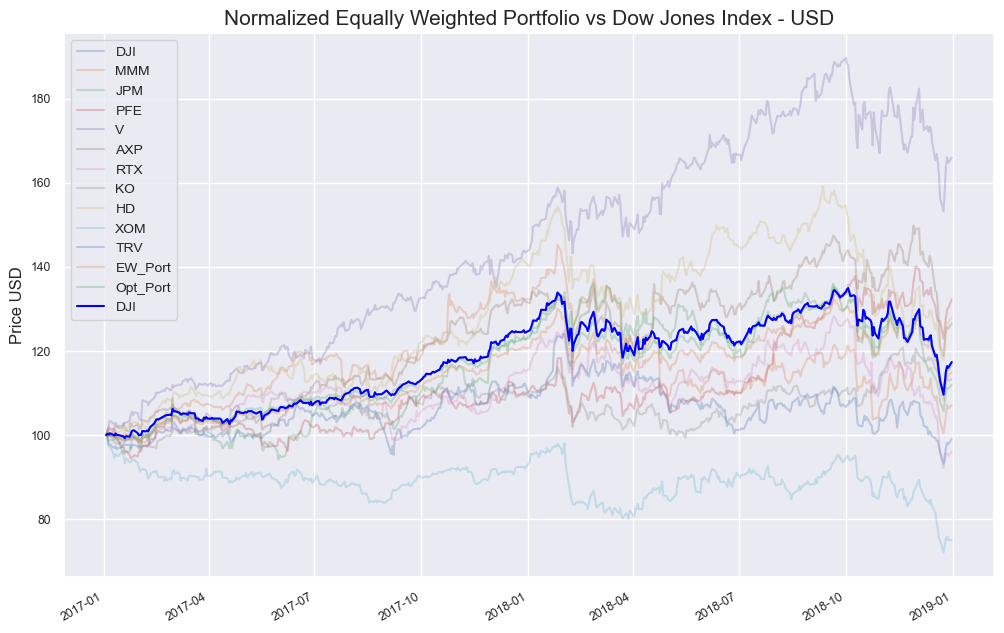

In [138]:
norm_track.plot(figsize = (12, 8), alpha=0.3)
norm_track['DJI'].plot(figsize = (12, 8), color='blue')
plt.legend(fontsize = 10, loc = 2)
plt.xlabel("")
plt.ylabel("Price USD", fontsize=12)

plt.title("Normalized Equally Weighted Portfolio vs Dow Jones Index - USD", fontsize=15)

plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_008_02.png", 
            bbox_inches='tight', dpi=90)
plt.show()




<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Index Tracking - The Optimal Tracking Portfolio</div>


Tracking portfolio that minimizes the tracking error
Try to find the optimal weights for the 10 stocks
can use an optimization algorithm

In [68]:
## import scipy optimize
import scipy.optimize as sco

In [69]:
### Contstraint:
## weights must sum up to 1 -> sum of weights - 1 = 0
## Lambda function
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [70]:
### Bounds: All weights shall be between 0 and 1 -> This can be changed
noa=10
bnds = tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [71]:
### Using scipy optimizer

## Run optimization based on function to be minimized,
## starting with equal weights
## and based on respective bounds and constraints

## x0 - Define a starting point (the starting point are the equal weights or 10 times 10% in this case)
## method = Selecting the quadratic optimization "SLSQP"

#opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints= cons)

opts = sco.minimize(fun=tracking_error,
                    x0=eweights,
                    args=(),method="SLSQP",jac=None,hess=None,hessp=None,bounds=bnds,constraints=(cons),tol=None,
callback=None,
options=None)




In [72]:
### Output of optimization
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.037961561739746914
       x: [ 1.310e-01  1.445e-01  5.985e-02  1.677e-01  4.029e-02
            1.005e-01  7.688e-02  1.096e-01  1.146e-01  5.508e-02]
     nit: 7
     jac: [ 7.441e-03  7.563e-03  7.450e-03  7.411e-03  7.372e-03
            7.337e-03  7.254e-03  7.539e-03  7.372e-03  7.685e-03]
    nfev: 77
    njev: 7

In [73]:
### Getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [74]:
print("Optimal weights for portfolio (Equally Weighted)")
pd.Series(index=tracking_stocks, data=optimal_weights)

### Example: KO - 0.076882 -> For Coca Cola is an optimal weight of 7.68%

Optimal weights for portfolio (Equally Weighted)


MMM    0.131020
JPM    0.144515
PFE    0.059847
V      0.167651
AXP    0.040286
RTX    0.100547
KO     0.076882
HD     0.109569
XOM    0.114603
TRV    0.055080
dtype: float64

In [132]:
print("Optimal weights for portfolio (Equally Weighted)")
print(pd.Series(index=tracking_stocks, data=optimal_weights))

### Example: KO - 0.076882 -> For Coca Cola is an optimal weight of 7.68%

Optimal weights for portfolio (Equally Weighted)
MMM    0.131020
JPM    0.144515
PFE    0.059847
V      0.167651
AXP    0.040286
RTX    0.100547
KO     0.076882
HD     0.109569
XOM    0.114603
TRV    0.055080
dtype: float64


In [75]:
#pd.Series(index=tracking_stocks, data=optimal_weights).sort_values(ascending=False)
##V is the company with more weight 16.76%


In [76]:
optimal_weights

array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [77]:
## Calculate the daily returns of the optimal portfolio
### by passing optimal_weights to the function port_ret
## Calculate the normalized values starting with the base value of 100

#opt_port = port_ret(weights=optimal_weights)
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
opt_port

Date
2017-01-04    100.125313
2017-01-05     99.822671
2017-01-06    100.145521
2017-01-09     99.669085
2017-01-10     99.526402
                 ...    
2018-12-24    109.460454
2018-12-26    114.706689
2018-12-27    116.037462
2018-12-28    115.455022
2018-12-31    116.345589
Length: 501, dtype: float64

In [78]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100

In [79]:
norm_track.columns

Index(['DJI', 'MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV',
       'EW_Port', 'Opt_Port'],
      dtype='object')

In [80]:
norm_track

### Have the normalized Dow Jones Index
### and on the right there are the equally weighted portfolio ew_port
### The optimized weights portfolio Opt_Port

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port,Opt_Port
Date,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364,100.164136,100.125313
2017-01-05,100.088168,99.809044,98.716035,101.848487,101.999995,99.960187,100.469184,99.880385,99.694733,97.425463,97.874277,99.765133,99.822671
2017-01-06,100.412645,100.101091,98.727501,101.454544,103.408804,100.159260,101.551928,99.856465,99.419255,97.370448,97.824644,99.981424,100.145521
2017-01-09,100.028273,99.561922,98.796282,101.424246,102.830189,100.676844,100.604537,98.851676,100.000000,95.764112,97.038874,99.546547,99.669085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,100.320130,105.628793,122.878786,153.119501,118.779034,92.086978,109.952153,117.742538,72.076139,93.159633,108.298000,109.460454
2018-12-26,115.072556,104.611059,110.008019,127.848481,163.811315,124.538817,95.650995,112.296649,125.292236,75.519859,96.914803,113.228018,114.706689
2018-12-27,116.382154,107.104742,111.246128,129.848480,166.050308,125.653619,95.425433,113.708133,126.811116,75.849932,98.155498,114.505929,116.037462


In [81]:
norm_track["Opt_Port"]

Date
2017-01-03    100.000000
2017-01-04    100.125313
2017-01-05     99.822671
2017-01-06    100.145521
2017-01-09     99.669085
                 ...    
2018-12-24    109.460454
2018-12-26    114.706689
2018-12-27    116.037462
2018-12-28    115.455022
2018-12-31    116.345589
Name: Opt_Port, Length: 502, dtype: float64

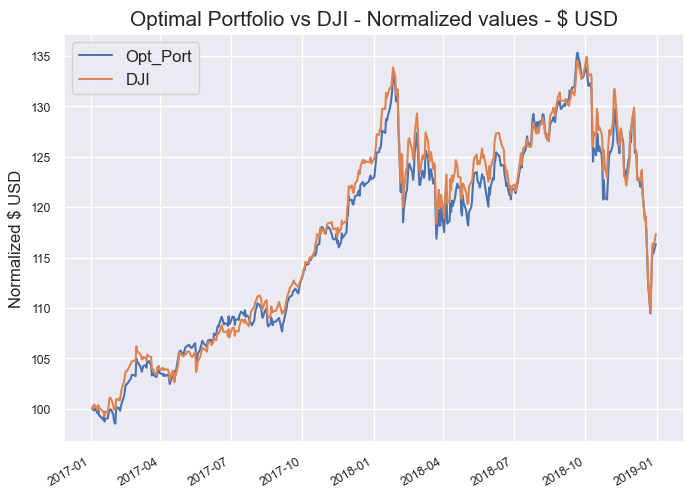

In [140]:
## Plotting the optimal portfolio that has the tracks of the DJI 
norm_track[["Opt_Port", "DJI"]].plot(figsize = (8, 6))
plt.legend(fontsize = 12, loc = 2)

plt.xlabel("")
plt.ylabel("Normalized $ USD",fontsize = 12)
plt.title("Optimal Portfolio vs DJI - Normalized values - $ USD",fontsize = 15)

plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_009_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

###Optimal portfolio is closer than the other strategies to the DJI


In [83]:
## Comparing Equally Weighted Portfolio vs the optimized weights portfolio and the Dow Jones Index

summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.084879,0.131867
EW_Port,0.078256,0.127138
DJI,0.089562,0.135206


summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

         	Return      	Risk
Opt_Port 	0.084879 	0.131867
EW_Port 	0.078256 	0.127138
    DJI 	0.089562 	0.135206




In [84]:
## Using pct_change
#summary_ann(returns=norm_track[["Opt_Port", "EW_Port", "DJI"]])
summary_ann(returns=norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.084879,0.131867
EW_Port,0.078256,0.127138
DJI,0.089562,0.135206


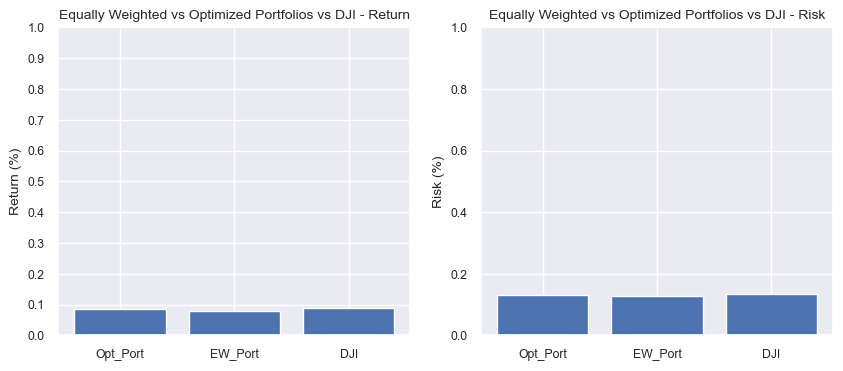

In [85]:
summary_opt_ew_dji_01 = summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].bar(x=summary_opt_ew_dji_01["Return"].index,
         height=summary_opt_ew_dji_01["Return"].values,
         width=0.8,
         bottom=None,
         align='center',
         data=None)

axes[0].set_xticks(ticks=np.arange(0, len(summary_opt_ew_dji_01["Return"].index)), labels=summary_opt_ew_dji_01["Return"].index)
axes[0].set_yticks(ticks=np.arange(0, 1.01, 0.1))
axes[0].set_ylabel("Return (%)", fontsize=10)
axes[0].set_title("Equally Weighted vs Optimized Portfolios vs DJI - Return", fontsize=10)


axes[1].bar(x=summary_opt_ew_dji_01["Risk"].index,
         height=summary_opt_ew_dji_01["Risk"].values,
         width=0.8,
         bottom=None,
         align='center',
         data=None)

axes[1].set_xticks(ticks=np.arange(0, len(summary_opt_ew_dji_01["Risk"].index)), labels=summary_opt_ew_dji_01["Risk"].index)
axes[1].set_yticks(ticks=np.arange(0, 1.01, 0.2))
axes[1].set_ylabel("Risk (%)", fontsize=10)
axes[1].set_title("Equally Weighted vs Optimized Portfolios vs DJI - Risk", fontsize=10)


plt.show()

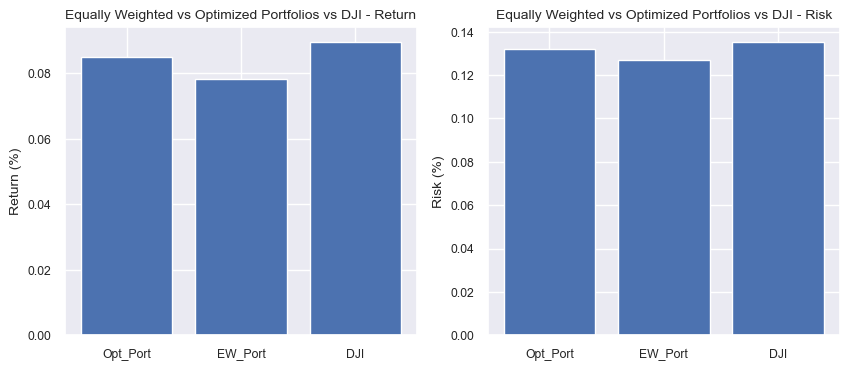

In [141]:
summary_opt_ew_dji_01 = summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].bar(x=summary_opt_ew_dji_01["Return"].index,
         height=summary_opt_ew_dji_01["Return"].values,
         width=0.8,
         bottom=None,
         align='center',
         data=None)

axes[0].set_xticks(ticks=np.arange(0, len(summary_opt_ew_dji_01["Return"].index)), labels=summary_opt_ew_dji_01["Return"].index)
#axes[0].set_yticks(ticks=np.arange(0, 0.2, 0.1))
axes[0].set_ylabel("Return (%)", fontsize=10)
axes[0].set_title("Equally Weighted vs Optimized Portfolios vs DJI - Return", fontsize=10)


axes[1].bar(x=summary_opt_ew_dji_01["Risk"].index,
         height=summary_opt_ew_dji_01["Risk"].values,
         width=0.8,
         bottom=None,
         align='center',
         data=None)

axes[1].set_xticks(ticks=np.arange(0, len(summary_opt_ew_dji_01["Risk"].index)), labels=summary_opt_ew_dji_01["Risk"].index)
#axes[1].set_yticks(ticks=np.arange(0, 1.01, 0.1))
axes[1].set_ylabel("Risk (%)", fontsize=10)
axes[1].set_title("Equally Weighted vs Optimized Portfolios vs DJI - Risk", fontsize=10)

plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_010_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Forward Testing - Part 01</div>


Forward Testing the optimized portfolio to see how it handles future unseen values.

Fitted the tracking portfolio on the training set.
Need to forward test the Testing period.

In [87]:
df.head(2)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.971429,60.360001,89.169998,61.16,27.730000,70.970001,33.738300,NaN,200.720001,41.07,...,64.540001,39.528004,53.549999,52.57,NaN,35.306732,46.07,47.549999,74.110001,12474.519531
2007-01-04,12.237143,59.919998,89.529999,61.00,28.459999,70.279999,34.004654,NaN,198.850006,40.57,...,64.050003,39.565765,53.099998,52.91,NaN,35.502777,46.16,47.779999,72.720001,12480.690430


In [88]:
ret.head(2)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,-0.00729,0.004037,-0.002616,0.026325,-0.009722,0.007895,NaN,-0.009316,-0.012174,...,-0.007592,0.000955,-0.008403,0.006468,NaN,0.005553,0.001954,0.004837,-0.018756,0.000495


In [89]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [90]:
##Function - Automate and scale the Tracking Error Calculation
def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)


In [142]:
def visual(data, tracking_stocks, weights, index, start, end, figsize=(12,8), fontsize=20):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = figsize)
    track.plot()
    index.plot()
    plt.legend(fontsize = fontsize, loc = 2)
    plt.show()

In [143]:
def visual(data, tracking_stocks, weights, index, start, end, figsize=(12,8), fontsize=20, saving_fig=False, save_fig_path_name="Users/Desktop/fig_00_00"):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = figsize)
    track.plot()
    index.plot()
    plt.legend(fontsize = fontsize, loc = 2)
    if saving_fig == True:
        #plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_008_01.png", 
                    #bbox_inches='tight', dpi=90)
        plt.savefig(save_fig_path_name, 
                    bbox_inches='tight', dpi=90)
    plt.show()


In [123]:
###### Calculating the tracking error in the training period to verify the code works
tracking_error_gen(data=ret, tracking_stocks=tracking_stocks, weights=optimal_weights, index="DJI", start="2017-01-01", end="2018-12-31")
##Result:0.037961561739746914
##Annualized Tracking Erorr of 3.79%


0.037961561739746914

In [124]:
## Forward Testing

forward_te = tracking_error_gen(data=ret, tracking_stocks=tracking_stocks, weights=optimal_weights, index="DJI", start="2019-01-01", end="2019-12-31")
forward_te

### Annualized Tracking Error for Forward Testing of 4.78%
## It is normal for the T.E. of the forward test to be higher



0.04784303229538718

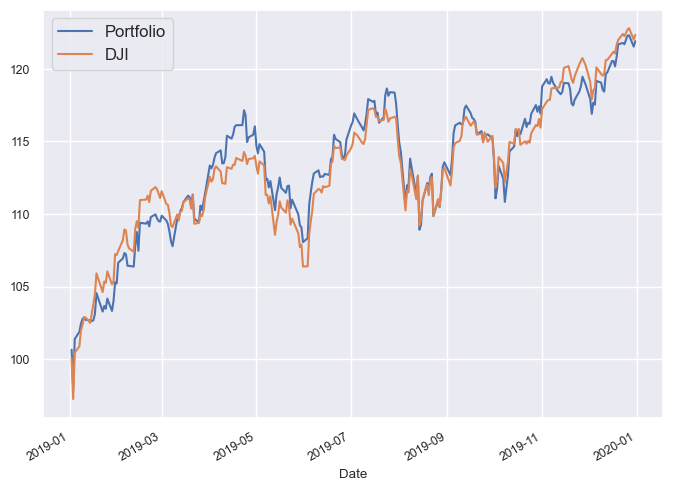

In [125]:
#visual(data=ret, tracking_stocks=tracking_stocks, weights=optimal_weights, index="DJI", start="2019-01-01", end="2019-12-31")
visual(data=ret, tracking_stocks=tracking_stocks, weights=optimal_weights, index="DJI", start="2019-01-01", end="2019-12-31", figsize=(8,6), fontsize=12)
### Both charts still move closely together. Even if the Tracking Error is slightly higher
### This needs further analysis.
### Can: Compare the tracking portfolio with random portfolios
## If the portfolio tracks the index better than the vast majority of random portfolios
## This strongly indicates that the method to create the tracking portfolios works with new data as well


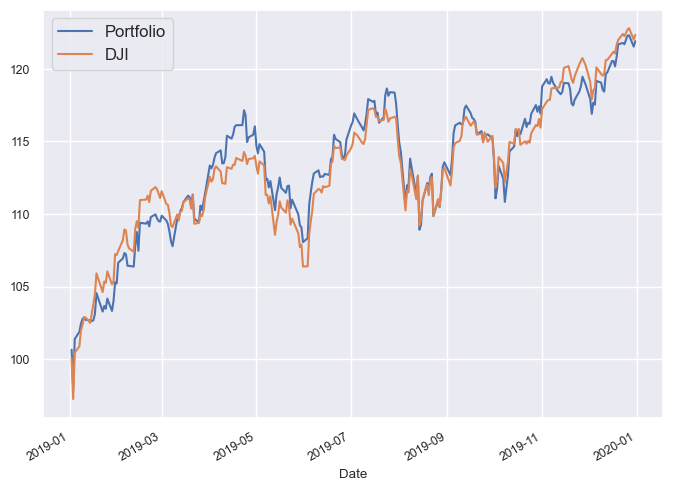

In [144]:
#visual(data, tracking_stocks, weights, index, start, end, figsize=(12,8), fontsize=20, saving_fig=False, save_fig_path='Users/Desktop/', fig_name="fig_00_00")
#visual(data, tracking_stocks, weights, index, start, end, figsize=(12,8), fontsize=20, saving_fig=False, save_fig_path='/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/', fig_name="0001_003_008_01.png")

visual(data=ret, tracking_stocks=tracking_stocks, weights=optimal_weights, index="DJI", start="2019-01-01", end="2019-12-31", figsize=(8,6), fontsize=12,saving_fig=True, save_fig_path_name="/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_011_01.png")


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Forward Testing - Part 02</div>


- Test the portfolio created.
- Will create random portfolios and Tracking Errors in the year 2019.
     - E.g. If 50% of the random portfolios that track the index more closely than the optimal portfolio, then the optimal portfolio is not working well and just guessing (50 50).
     - If this is the case will need to use more complex methods to create a better tracking portfolio.

- Random portfolio creation by selecting 10 random stocks and generate random weights for the stocks.

In [95]:
df03 = df.copy()


In [131]:
len(df03.columns)## 31
df03.columns

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD',
       'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
       'PFE', 'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM',
       'DJI'],
      dtype='object')

In [97]:
df03[["DOW", "DJI"]]

,DOW,DJI
Date,,
2007-01-03,NaN,12474.519531
2007-01-04,NaN,12480.690430
2007-01-05,NaN,12398.009766
2007-01-08,NaN,12423.490234
2007-01-09,NaN,12416.599609
...,...,...
2020-03-24,28.469999,20704.910156
2020-03-25,30.379999,21200.550781
2020-03-26,29.680000,22552.169922


In [98]:
### Creating a bucket where to randomly select 10 stocks
### Dropping DOW Stock - There is not full data for 2019
### Dropping Dow Jones Index

#bucket = df03.drop(columns=["DOW", "DJI"], inplace=True)
bucket = df.columns.drop(["DOW", "DJI"])
bucket

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM',
       'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE',
       'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object')

In [99]:
len(bucket)

29

In [100]:
## Random Sampling without replacement
## Doesn't make sense to have the same stock twice in the same sample
noa=10
np.random.choice(a=bucket, size=noa, replace=False, p=None)


array(['IBM', 'XOM', 'WBA', 'JNJ', 'DIS', 'MSFT', 'BA', 'UNH', 'RTX',
       'KO'], dtype=object)

random_numbers = np.random.random(4)
random_numbers = array([0.74740181, 0.09202466, 0.77466889, 0.15830037])

np.sum([0.74740181, 0.09202466, 0.77466889, 0.15830037]) = 1.7723957300000002

  (0.74740181/1.7723957300000002)
+ (0.09202466/1.7723957300000002)
+ (0.77466889/1.7723957300000002)
+ (0.15830037/1.7723957300000002)
                                    = 0.9999999999999999



In [101]:
## Creating random weights - Creating 10 random floats
## Random floats Divided by the total sum (so that the total amount equals 1)

random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()
random_weights.sum()

1.0

In [102]:
np.random.seed(123)
noa=10
random_stocks = np.random.choice(a=bucket, size=noa, replace=False, p=None)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()


In [103]:
print(f"{random_stocks, random_weights} \n {random_weights.sum()}")

(array(['GS', 'XOM', 'CVX', 'VZ', 'HD', 'WBA', 'JPM', 'RTX', 'JNJ', 'TRV'],
      dtype=object), array([0.0858475 , 0.05974735, 0.098733  , 0.14853474, 0.07177554,
       0.08370995, 0.13136476, 0.07500036, 0.04705319, 0.19823361])) 
 0.9999999999999999


In [104]:

print(random_stocks, random_weights, random_weights.sum())

['GS' 'XOM' 'CVX' 'VZ' 'HD' 'WBA' 'JPM' 'RTX' 'JNJ' 'TRV'] [0.0858475  0.05974735 0.098733   0.14853474 0.07177554 0.08370995
 0.13136476 0.07500036 0.04705319 0.19823361] 0.9999999999999999


In [105]:
tracking_error_gen(data=ret, tracking_stocks=random_stocks, weights=random_weights, index="DJI", start="2019-01-01", end="2019-12-31")


0.05553660882031692

In [106]:
forward_te

0.04784303229538718

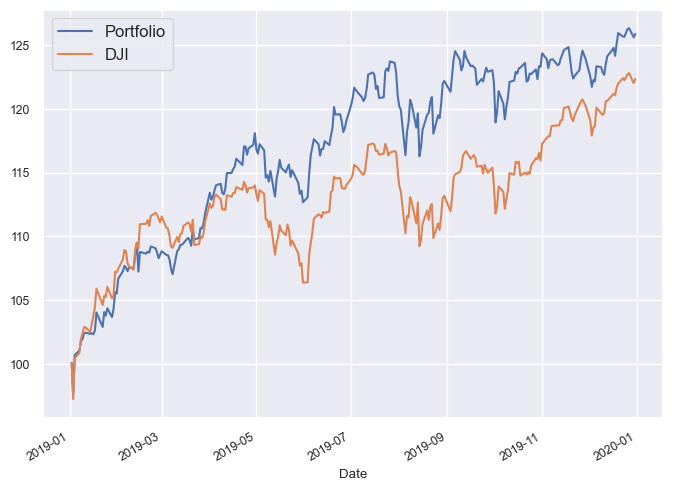

<Figure size 640x480 with 0 Axes>

In [118]:
#visual(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")
visual(ret, tracking_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31", figsize=(8,6), fontsize=12)


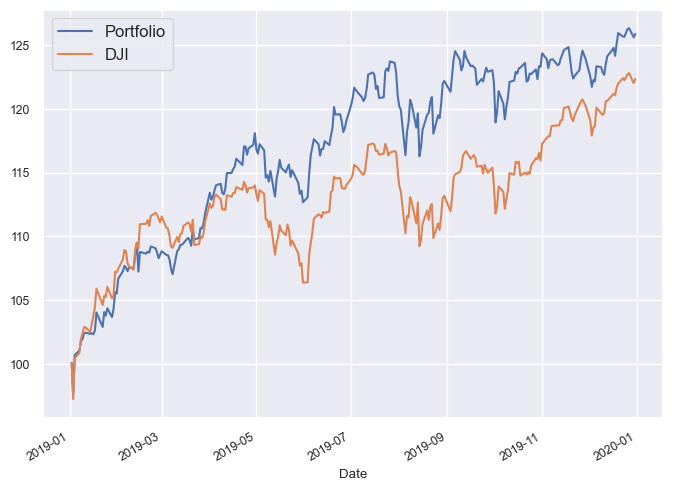

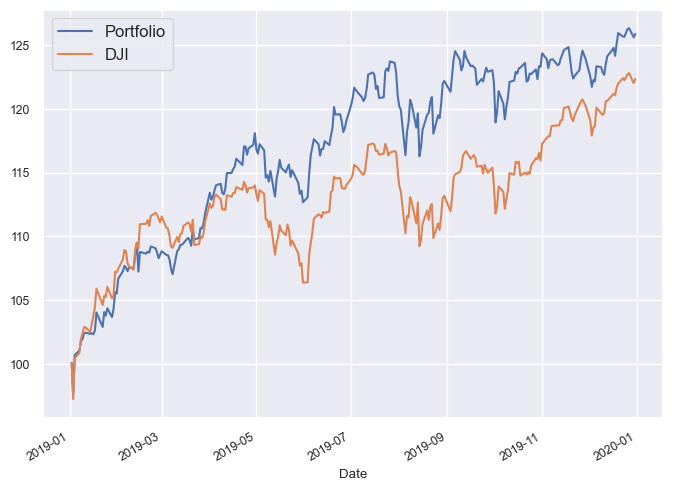

In [145]:
#visual(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")
visual(ret, tracking_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31", figsize=(8,6), fontsize=12)
visual(data=ret, tracking_stocks=tracking_stocks, weights=random_weights, index="DJI", start="2019-01-01", end="2019-12-31", figsize=(8,6), fontsize=12,saving_fig=True, save_fig_path_name="/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_012_01.png")


##### Create 10,000 random portfolios and calculate 10,000 tracking errors

In [108]:
### Create an empty np array to store 10,000 tracking errors
# Each portfolio consists of 10 stocks 

#bucket = df.columns.drop(["DOW", "DJI"])
#noa = 10
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
    
    #tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")
    tes[i] = tracking_error_gen(data=ret, tracking_stocks=random_stocks, weights=random_weights, index="DJI", start="2019-01-01", end="2019-12-31")


In [109]:
## How many portfolios end up with a Tracking Error Lower than the tracking portfolio

## For each random portfolio checking whether the Tracking Error
##is lower than the forward tracking error of the tracking portfolio
##and then take the mean to calculate percentage
## 
###(tes < forward_te).mean()*100### 6.55%
(tes < forward_te).mean()

### 0.0655
### 6.55% of the random portfolios are better than the tracking portfolio



0.0655

6.55% of the random portfolios are better than the tracking portfolio
This is a strong indication that the tracking portfolio has superior abilities to track the index. This is not random
6.5% is not too bad for the small sample

In [110]:
print(tes)

[0.04704862 0.05748346 0.0502482  ... 0.05962819 0.05524602 0.07659466]


In [111]:
forward_te

0.04784303229538718

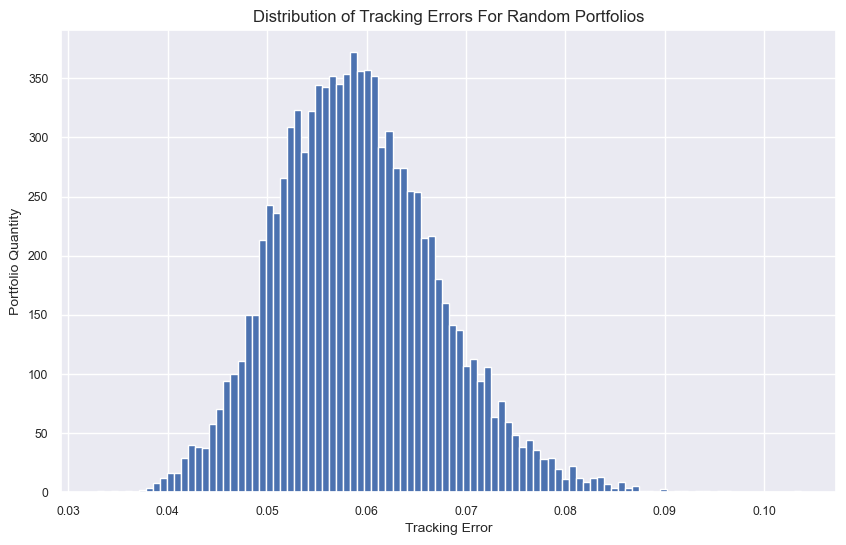

In [146]:
## Histogram - Distribution of 10,000 Tracking Errors
plt.figure(figsize = (10, 6))
plt.hist(x=tes, bins = 100)

plt.title("Distribution of Tracking Errors For Random Portfolios", fontsize=12)
plt.xlabel("Tracking Error", fontsize=10)
plt.ylabel("Portfolio Quantity", fontsize=10)

plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_013_01.png", 
            bbox_inches='tight', dpi=90)
plt.show()

###### Here we have a mean Tracking error of around 6%
###### The tracking portfolio is at 4.7%
###### Only 6.5% of all random portfolios are better


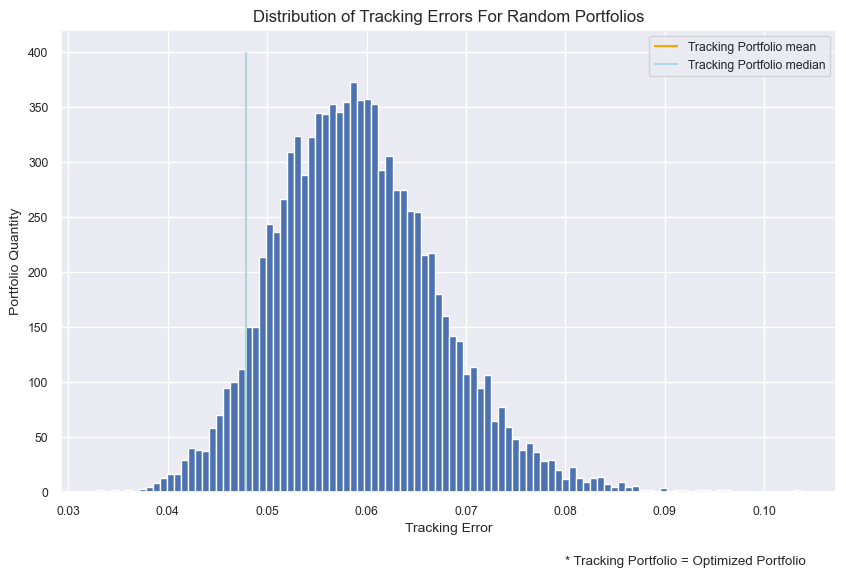

In [147]:
## Histogram - Distribution of 10,000 Tracking Errors
plt.figure(figsize = (10, 6))
plt.hist(x=tes, bins = 100)

#plt.vlines(x=tes.mean(), ymin=0, ymax=400, color='orange', label="Tracking Error mean")
#plt.vlines(x=np.median(tes), ymin=0, ymax=400, color='lightblue', label="Tracking Error median")

plt.vlines(x=forward_te.mean(), ymin=0, ymax=400, color='orange', label="Tracking Portfolio mean")
plt.vlines(x=np.median(forward_te), ymin=0, ymax=400, color='lightblue', label="Tracking Portfolio median")

plt.title("Distribution of Tracking Errors For Random Portfolios", fontsize=12)
plt.xlabel("Tracking Error", fontsize=10)
plt.ylabel("Portfolio Quantity", fontsize=10)
plt.legend()

plt.text(x=0.08, y=-65.9, s="* Tracking Portfolio = Optimized Portfolio", fontdict=None)
plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/03/0001_003_013_02.png", 
            bbox_inches='tight', dpi=90)
plt.show()

###### Here we have a mean Tracking error of around 6%
###### The tracking portfolio is at 4.7%
###### Only 6.5% of all random portfolios are better


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Conclusion</div>


In [114]:
## Backtesting Strategies Risk And Return
all_strategies_df_sorted = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Results/02/all_strategies_df.csv", index_col='Unnamed: 0')
all_strategies_df_sorted = all_strategies_df_sorted.sort_values(by="Return", ascending=True)
all_strategies_df_sorted


,Return,Risk
SMA50_sub_SMA200_df08,-0.022887,0.167655
SMA50_sub_SMA200_contr_df09,0.022887,0.167655
Simple_Contrarian_df03,0.057966,0.167946
Neutral_Short_Selling_df04,0.072152,0.125301
Buy_and_Hold_df,0.087212,0.167896
Buy_or_Short_1Percent_df05,0.174262,0.167659


###### Backtesting

## Backtesting Strategies - Risk And Return

| Strategy | Return |   Risk |
|--|--|--|
| SMA50_sub_SMA200_df08       | -0.022887 | 0.167655 |
| SMA50_sub_SMA200_contr_df09  | 0.022887 | 0.167655 |
| Simple_Contrarian_df03       | 0.057966 | 0.167946 |
| Neutral_Short_Selling_df04   | 0.072152 | 0.125301 |
| Buy_and_Hold_df              | 0.087212 | 0.167896 |
| Buy_or_Short_1Percent_df05   | 0.174262 | 0.167659 |



The best result obtained so far was with the portfolio optimization, where minimizing the Tracking Errors with 

The best result so far was obtained by using the following strategy:
Using the optimize SciPy method to minimize the Tracking Error using the Quadratic Optimization "SLSQP" on equally distributed weights and setting the respective boundaries.

6.55% of the random portfolios are better than the tracking portfolio.
This is a strong indication that the tracking portfolio has superior abilities to track the index. This is not random
6.5% is not too bad for the small sample


In [115]:
(tes.mean() - forward_te)*100

1.1240597100176677

In [116]:
100 - (tes < forward_te).mean()*100

93.45

6.55% of the 1000 random portfolios created were better than the tracking portfolio using the optimization to reduce the Tracking Error
Meaning that the resulting 93.45% of the random portfolios have a worse tracking error than the tracking portfolio